## 1. Mise en forme des données

#### Réseau de convolution
Un réseau de convolution doit être constitué de couche de convolution avec des couches de pooling, une couche flatten, des couches denses avec une activation Relu, on peut y ajouter des dropout et enfin un softmax pour finir.

Pour les entrées, il faut normaliser les images en les divisant par 255 pour avoir des valeurs compris entre 0 et 1. \
Pour l'utilisation de **sparse_categorical_crossentropy** il ne faut pas que les labels soient des vecteurs one-hot mais plutot des entiers.

*Pourquoi ces transformation* :\
Il n'y a donc pas besoin de transformer les labels en one-hot car la fonction **sparse_categorical_crossentropy** s'attend à recevoir des entiers. \
Et normaliser les images aide à avoir un meilleure apprentissage pour le modèle.

In [1]:
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

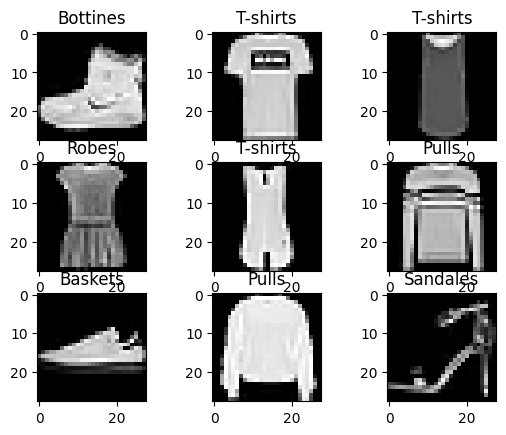

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label_names = ['T-shirts', 'Pantalons', 'Pulls', 'Robes', 'Manteaux',
               'Sandales', 'Chemises', 'Baskets', 'Sacs', 'Bottines']

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(label_names[y_train[i]])
plt.show()

In [3]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

X_train /= 255
X_test /= 255

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


## 2. Création d’un premier modèle 

La couche de sortie dois être un softmax car nous avons une classification multiple à faire, avec un nombre de neurones égale au nombre de classe (10 pour nous, de 0 à 9)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 244,298 (954.29 KB)

 Non-trainable params: 0 (0.00 B)

Il y a un total de 244,298 paramètres à caler. Pour la première convolution : 5 * 5 * 16 + 16 = 416. On peut constater le nombre de paramètre détailler sur le "summary".

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 512
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5852 - loss: 1.2400 - val_accuracy: 0.7923 - val_loss: 0.5396
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8085 - loss: 0.5076 - val_accuracy: 0.8263 - val_loss: 0.4839
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8442 - loss: 0.4327 - val_accuracy: 0.8586 - val_loss: 0.3900
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8629 - loss: 0.3823 - val_accuracy: 0.8698 - val_loss: 0.3694
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8758 - loss: 0.3438 - val_accuracy: 0.8770 - val_loss: 0.3503
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8840 - loss: 0.3221 - val_accuracy: 0.8827 - val_loss: 0.3298
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8863 - loss: 0.3137 - val_accuracy: 0.8811 - val_loss: 0.3305
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8937 - loss: 0.2965 - val_accuracy: 0.8796 - v

<Axes: >

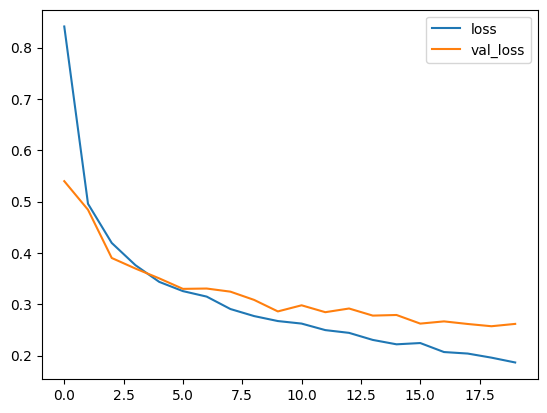

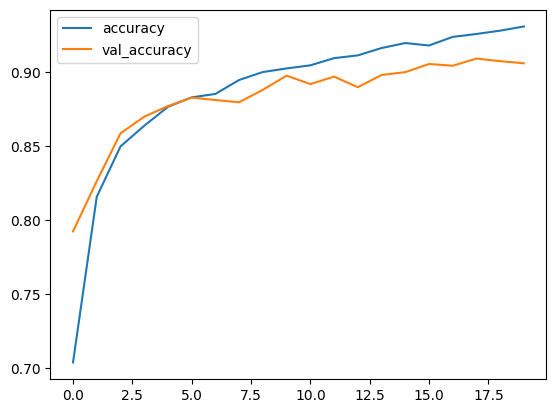

In [6]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Le modèle n'est pas trop mal, nous avons une accuracy d'environ 90 ce qui est plutot bien, mais nous pouvons constater que les courbes ne sont pas très lisse.

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3941 - loss: 1.6444 - val_accuracy: 0.7598 - val_loss: 0.6362
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7341 - loss: 0.7098 - val_accuracy: 0.8005 - val_loss: 0.5302
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7699 - loss: 0.6138 - val_accuracy: 0.8238 - val_loss: 0.4762
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7941 - loss: 0.5565 - val_accuracy: 0.8375 - val_loss: 0.4439
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8080 - loss: 0.5196 - val_accuracy: 0.8480 - val_loss: 0.4168
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8169 - loss: 0.4917 - val_accuracy: 0.8553 - val_loss: 0.3927
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8255 - loss: 0.4713 - val_accuracy: 0.8634 - val_loss: 0.3731
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8367 - loss: 0.4480 - val_accuracy: 0.8716 - v

<Axes: >

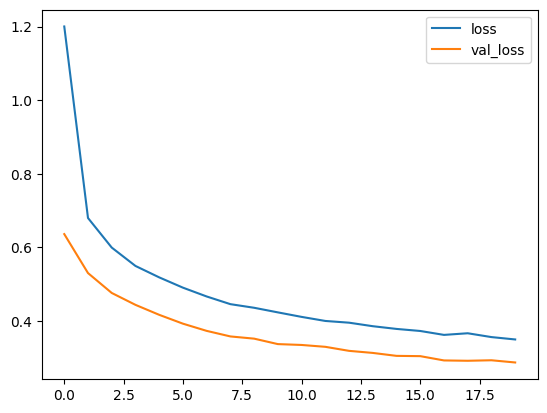

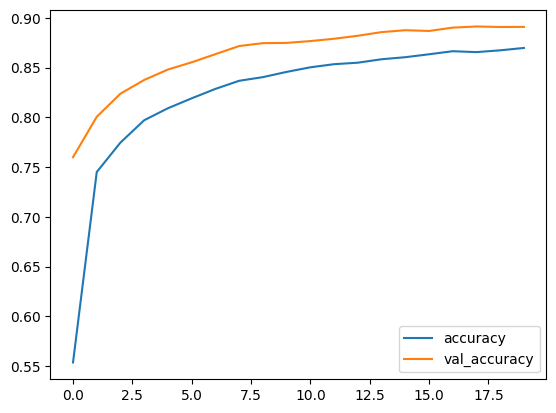

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Les courbes sont plus lisse et le modele est plus performant.

Il n'est pas juditieux dans notre cas de faire plus de 20 epochs, le modèle commencerais à faire du sur apprentissage.

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3259 - loss: 1.8058 - val_accuracy: 0.7582 - val_loss: 0.6330
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7231 - loss: 0.7443 - val_accuracy: 0.7924 - val_loss: 0.5244
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7672 - loss: 0.6192 - val_accuracy: 0.8102 - val_loss: 0.4946
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7834 - loss: 0.5680 - val_accuracy: 0.8228 - val_loss: 0.4489
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7989 - loss: 0.5278 - val_accuracy: 0.8422 - val_loss: 0.4211
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8117 - loss: 0.5069 - val_accuracy: 0.8504 - val_loss: 0.4032
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8273 - loss: 0.4745 - val_accuracy: 0.8609 - val_loss: 0.3856
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8325 - loss: 0.4607 - val_accuracy: 0.8682 - v

<Axes: >

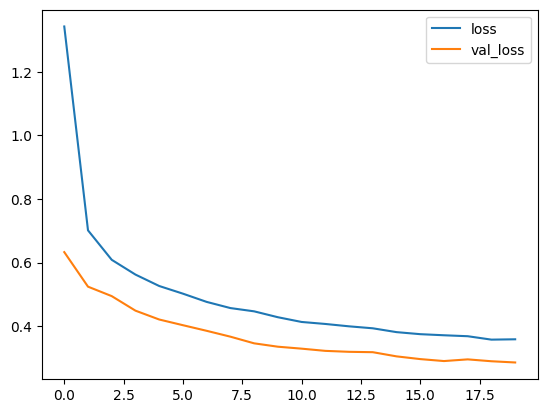

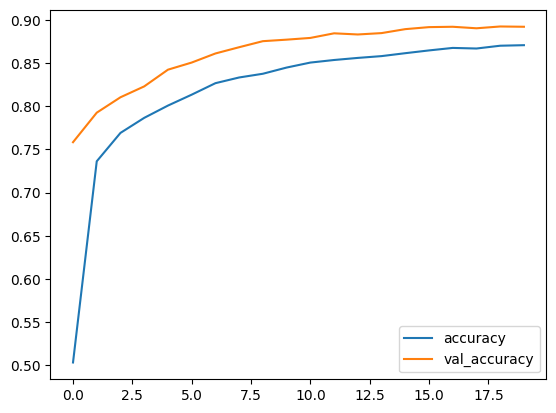

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

En ajoutant une couche de 128 notre modèle, il n'est pas vraiment améliorer. Je pense qu'il faudrait enlever la dernière couche car les résultats obtenus sont équivalent et je ne pense pas que le modèle puisse être plus améliorer que ce qu'on à maitenant.

## Traitement des données cifar

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [10]:
y_train.shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

Les données sont de type numpy.ndarray. La forme des données d'entrée pour le train est (50000, 32, 32, 3) et pour le test est (10000, 32, 32, 3). Les targets pour le train ont la forme (50000, 1) et pour le test ont la forme (10000, 1). Ce qui indique que la taille des images est de 32 x 32 pixels et sont en couleurs.

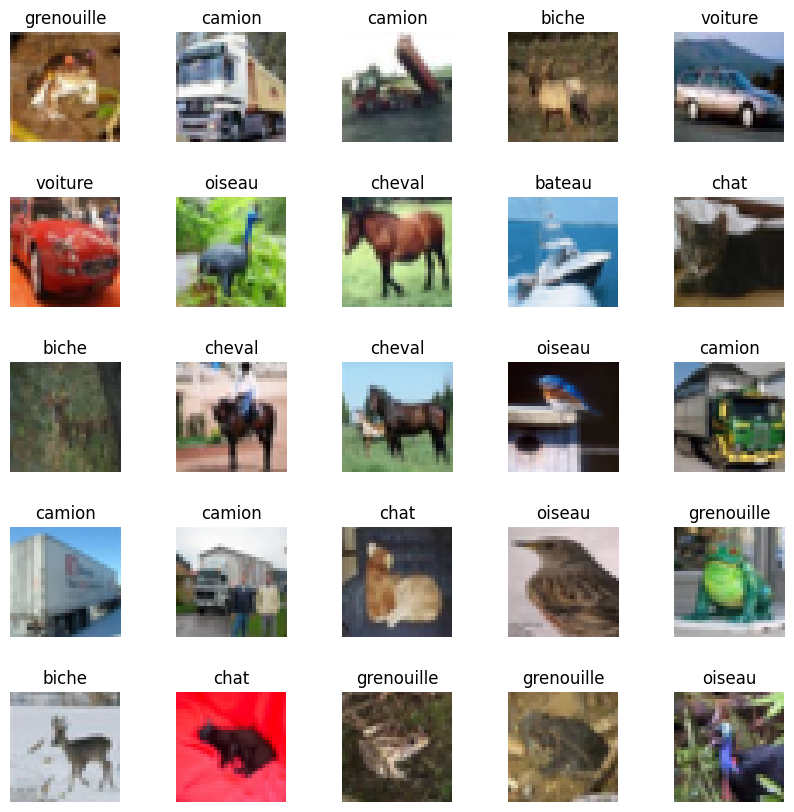

In [11]:
target_names = ['avion', 'voiture', 'oiseau', 'chat', 'biche', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

plt.figure(figsize=(10, 10))  # Ajuster la taille de la figure
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.imshow(X_train[i])
    plt.title(target_names[y_train[i][0]])
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Ajuster l'espace entre les sous-intrigues
plt.show()

In [12]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,210 (1.28 MB)

 Trainable params: 335,210 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.1499 - loss: 8.8357 - val_accuracy: 0.3075 - val_loss: 1.9472
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3547 - loss: 1.8142 - val_accuracy: 0.4376 - val_loss: 1.5736
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.4595 - loss: 1.5038 - val_accuracy: 0.4888 - val_loss: 1.4458
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5217 - loss: 1.3455 - val_accuracy: 0.4936 - val_loss: 1.4154
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5716 - loss: 1.2193 - val_accuracy: 0.5337 - val_loss: 1.3299
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6042 - loss: 1.1222 - val_accuracy: 0.5570 - val_loss: 1.2759
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.6414 - loss: 1.0353 - val_accuracy: 0.5593 - val_loss: 1.2717
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6565 - loss: 0.9847 - val_accuracy: 0.5709 - v

<Axes: >

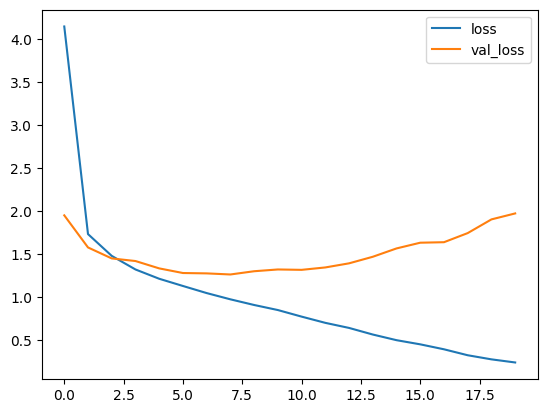

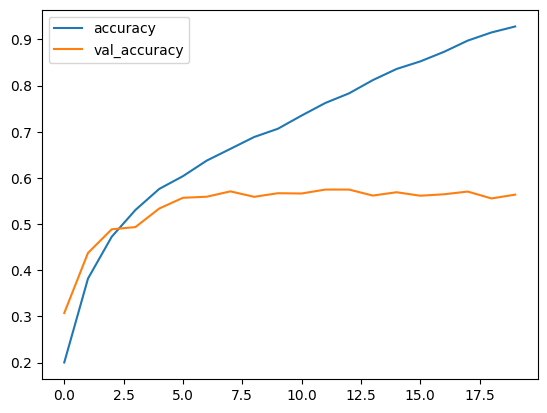

In [13]:
model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

On voit bien que le modèle n'est pas très bon, on arrive à une accuracy de 51.

In [14]:
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32')
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32')

X_train /= 255
X_test /= 255

Je pense qu'en normalisant les images le modèle devrait être amélioré.

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.1942 - loss: 2.1343 - val_accuracy: 0.4142 - val_loss: 1.6491
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3762 - loss: 1.6839 - val_accuracy: 0.4570 - val_loss: 1.5176
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.4343 - loss: 1.5466 - val_accuracy: 0.5029 - val_loss: 1.3831
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4767 - loss: 1.4523 - val_accuracy: 0.5171 - val_loss: 1.3590
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5048 - loss: 1.3886 - val_accuracy: 0.5556 - val_loss: 1.2564
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.5306 - loss: 1.3182 - val_accuracy: 0.5670 - val_loss: 1.2216
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5481 - loss: 1.2678 - val_accuracy: 0.5833 - val_loss: 1.1823
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5658 - loss: 1.2224 - val_accuracy: 0.5940 - v

<Axes: >

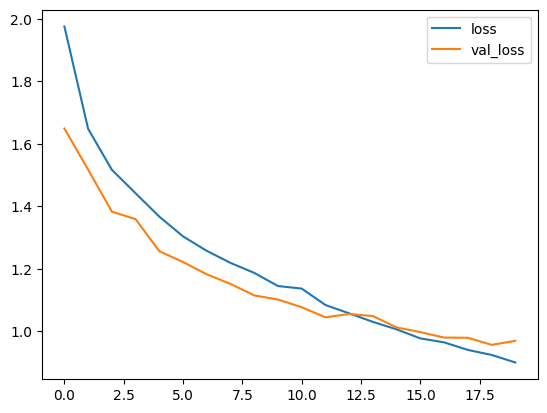

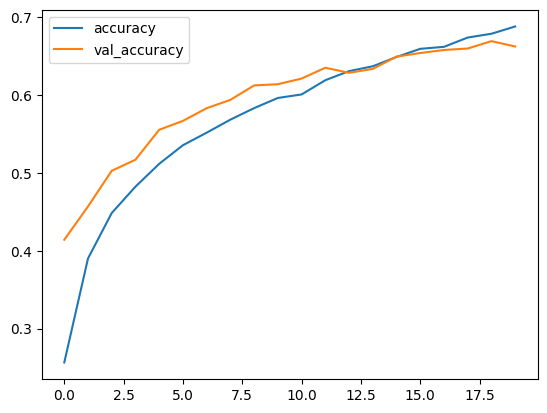

In [17]:
model_cifar = tf.keras.models.Sequential()
model_cifar.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model_cifar.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')) 
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_cifar.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_cifar.add(tf.keras.layers.Flatten())
model_cifar.add(tf.keras.layers.Dense(256, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(128, activation='relu'))
model_cifar.add(tf.keras.layers.Dropout(0.5))
model_cifar.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cifar.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

Le model n'est toujours pas très bon même si on peut voir que le modèle généralise assez bien, on peut voir des pics sur les courbes mais il n'a toujours pas une bonne accuracy.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


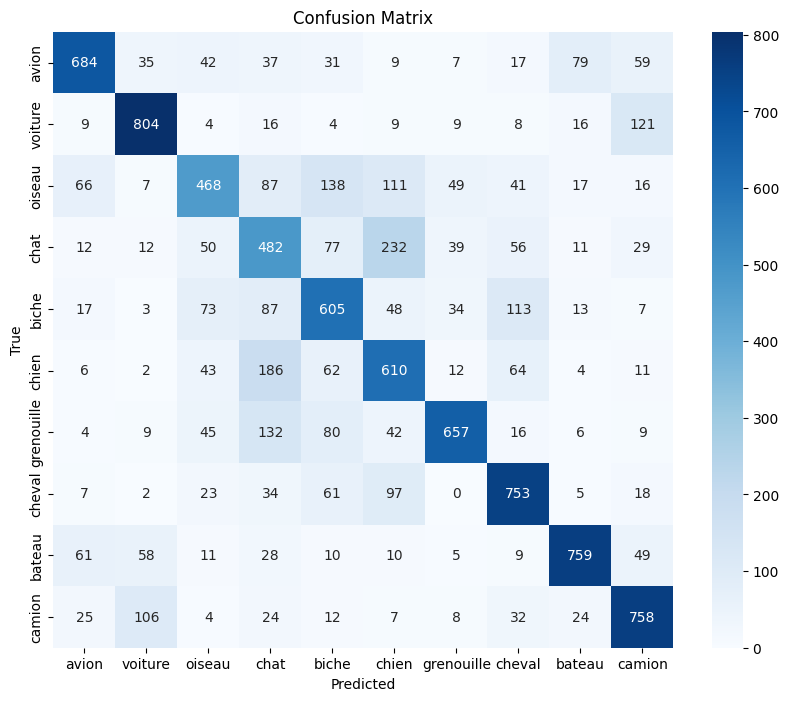

              precision    recall  f1-score   support

       avion       0.77      0.68      0.72      1000
     voiture       0.77      0.80      0.79      1000
      oiseau       0.61      0.47      0.53      1000
        chat       0.43      0.48      0.46      1000
       biche       0.56      0.60      0.58      1000
       chien       0.52      0.61      0.56      1000
  grenouille       0.80      0.66      0.72      1000
      cheval       0.68      0.75      0.71      1000
      bateau       0.81      0.76      0.78      1000
      camion       0.70      0.76      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [ ]:
y_pred = model_cifar.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten() 

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=target_names))